# 1. For "virtualreality" subreddit


# 1.1. Word frequency analysis


In [2]:
import nltk


nltk.download()  # downloading all NLTK pacakges

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# importing neccessary libraries
import pandas as pd
import numpy as np
from pprint import pprint
import nltk
from nltk.corpus import stopwords  # to remove common words like to, the, etc.
from nltk.tokenize import word_tokenize  # to break text into words
from nltk.stem import WordNetLemmatizer  # for word lemmatization
from collections import Counter  # to count hashable objects
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:
# reading the dataset of "virtualreality" subreddit
df_vr = pd.read_csv("CSV Files/Scrape_vr_final.csv")
# df_vr.dtypes

# checking the info column
df_vr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        949 non-null    int64  
 1   Id            949 non-null    object 
 2   Title         949 non-null    object 
 3   Upvotes       949 non-null    int64  
 4   Upvote Ratio  949 non-null    float64
 5   Comments      949 non-null    int64  
 6   Timestamp     949 non-null    object 
 7   Total Votes   949 non-null    int64  
 8   Downvotes     949 non-null    int64  
 9   Engagement    949 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 74.3+ KB


In [5]:
# coverting timestamp into date time
df_vr.Timestamp = pd.to_datetime(df_vr.Timestamp)

In [6]:
# creating a "Date", "Hour", "Day of Week" columns
df_vr["Date"] = df_vr["Timestamp"].dt.date
df_vr["Date"] = pd.to_datetime(df_vr["Date"])
df_vr["Hour"] = df_vr.Timestamp.dt.hour
df_vr["Day of Week"] = df_vr.Date.dt.day_name()
df_vr

,Number,Id,Title,Upvotes,Upvote Ratio,Comments,Timestamp,Total Votes,Downvotes,Engagement,Date,Hour,Day of Week
0,1,1ahbbp2,Weekly VR - What Did you Play?,3,0.81,19,2024-02-02 19:01:15,3,0,22,2024-02-02,19,Friday
1,2,1amvqvt,Weekly VR - What Did you Play?,3,1.00,7,2024-02-09 19:01:15,3,0,10,2024-02-09,19,Friday
2,3,1aqnapr,Every VR subreddit,185,0.94,34,2024-02-14 13:49:08,196,11,230,2024-02-14,13,Wednesday
3,4,1aq8eu0,"Mark Zuckerberg on Instagram: ""I tried Vision ...",445,0.90,437,2024-02-13 23:46:23,494,49,931,2024-02-13,23,Tuesday
4,5,1aps10e,"These Apple Vision Pro mods are getting wild, ...",1148,0.92,152,2024-02-13 12:13:41,1247,99,1399,2024-02-13,12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,945,1af04fu,hello guys yt help fast pls,0,0.17,3,2024-01-30 21:37:02,0,0,3,2024-01-30,21,Tuesday
945,946,1aeky30,Help me with some ideas for my vr game idea.,2,1.00,7,2024-01-30 10:00:18,2,0,9,2024-01-30,10,Tuesday
946,947,1adq9pr,"I love VR, but I rarely play because of the ha...",210,0.87,208,2024-01-29 08:11:22,241,31,449,2024-01-29,8,Monday
947,948,1aenzuy,Need some advice,1,0.67,1,2024-01-30 13:07:23,1,0,2,2024-01-30,13,Tuesday


In [7]:
# create a new data frame
df2_vr = df_vr[df_vr["Timestamp"] >= "2023-11-01"]
print(df_vr.shape)
print(df2_vr.shape)

(949, 13)
(949, 13)


# To understand the trend of number of posts per day


Text(0.5, 0.98, 'The trend of number of posts per day and the max post count was 80')

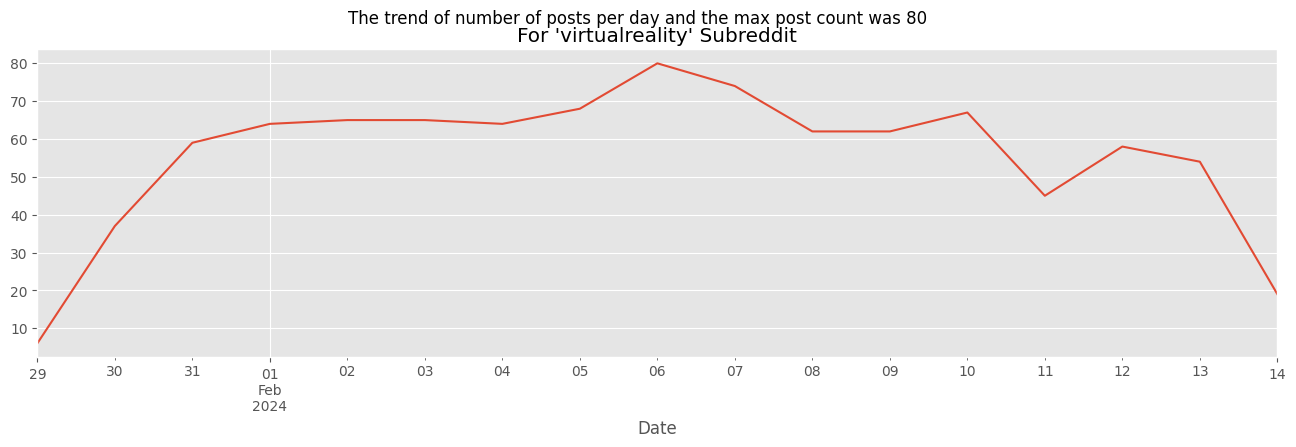

In [8]:
plt.style.use("ggplot")
df2_vr.groupby("Date")["Title"].count().plot(figsize=(16, 4))
plt.title("For 'virtualreality' Subreddit")
plt.suptitle(
    "The trend of number of posts per day and the max post count was "
    + str(df2_vr.groupby("Date")["Title"].count().max())
)

In [9]:
# joining all the title rows and tokenize them into words
all_titles = " ".join(df_vr["Title"])
words = word_tokenize(all_titles)
pprint(all_titles)

('Weekly VR - What Did you Play? Weekly VR - What Did you Play? Every VR '
 'subreddit Mark Zuckerberg on Instagram: "I tried Vision Pro. Here\'s my take '
 '..." These Apple Vision Pro mods are getting wild, this looks like the '
 'hololens military edition  Meta gave Max Mustard the greenlight to skip '
 'AppLab and launch directly on the store March 21, 24! My father is going to '
 'pass soon and I want to take some VR footage/spatial video as a memory. Most '
 'breath taking thing I’ve seen done in the meta quest 3 You say you like VR '
 'and like fighting in PvP, then our game is perfect for you, and we are '
 'hosting a tournament RIGHT NOW @ vfcgame.com to learn more Star Wars '
 "Squadrons is now $1.99! Spoiler: It's worth it! Wants & Need in a "
 'Hypothetical Ideal VR Game Engine One week with the Vision Pro Opinion: '
 "Apple's Persona looks like a hologram you might find on a tombstone. kiwi "
 'head strap with headphones Best cam for vr Videos I am truly sorry Bruce Lee '


In [10]:
# sorting the dates
df2_vr.groupby("Date", as_index=False)["Title"].count().sort_values(
    by="Title", ascending=False
)

,Date,Title
8,2024-02-06,80
9,2024-02-07,74
7,2024-02-05,68
12,2024-02-10,67
4,2024-02-02,65
5,2024-02-03,65
3,2024-02-01,64
6,2024-02-04,64
10,2024-02-08,62
11,2024-02-09,62


In [11]:
# to clean the words of punctuations, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words("english")]
    # to deal with alphabets at the moment
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [12]:
lowered = clean_words(words)  # converting all words to lowercase
# lowered

In [13]:
bow = Counter(lowered)  # to count the words
# bow

In [14]:
# creating data frame for visualization of frequency of words
data_vr = pd.DataFrame(bow.items(), columns=["Word", "Frequency"]).sort_values(
    by="Frequency", ascending=False
)

In [44]:
# data_words_vr = data_vr.head(30)  # n = 30 for proper analysis
data_words_vr = data_vr.head(30)  # n = 30 for proper analysis


# data_words_vr

# Bar Plot


Text(0.5, 1.0, "For 'virtualreality' Subreddit")

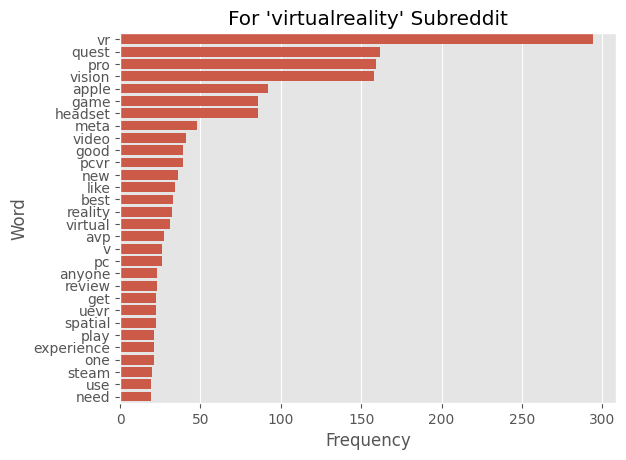

In [45]:
sns.barplot(x="Frequency", y="Word", data=data_words_vr)
plt.title("For 'virtualreality' Subreddit")

# Result: The most frequent word is 'vr'


# 1.2. Analysing emojis


In [17]:
%pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import emoji

In [19]:
def get_emojis_vr(sentence):
    sentence = " ".join(sentence)
    words = word_tokenize(sentence)
    emojis = [e for e in words if e in emoji.EMOJI_DATA]
    return emojis

In [20]:
emojis_bow_vr = get_emojis_vr(df_vr["Title"])
Counter(emojis_bow_vr).items()

dict_items([('🛳️', 1), ('😎', 1), ('👀', 1), ('🥳', 1), ('✈️', 1), ('⛵', 1), ('😈', 1), ('💯', 1), ('👇', 1), ('🐄', 1), ('🐠', 1), ('🏁', 1)])

# Creating and analyzing data frame for emojis


In [21]:
emoji_count_vr = Counter(emojis_bow_vr).items()
emoji_frame_vr = pd.DataFrame(emoji_count_vr, columns=["Emoji", "Count"])
emoji_frame_vr.sort_values(by="Count", ascending=False)

,Emoji,Count
0,🛳️,1
1,😎,1
2,👀,1
3,🥳,1
4,✈️,1
5,⛵,1
6,😈,1
7,💯,1
8,👇,1
9,🐄,1


# 2. For "webdev" subreddit


# 2.1. Word frequency analysis


In [22]:
# reading the dataset of "webdev" subreddit
df_wd = pd.read_csv("CSV Files/Scrape_wd_final.csv")
# df_wd.dtypes

# checking the info column
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        582 non-null    int64  
 1   Id            582 non-null    object 
 2   Title         582 non-null    object 
 3   Upvotes       582 non-null    int64  
 4   Upvote Ratio  582 non-null    float64
 5   Comments      582 non-null    int64  
 6   Timestamp     582 non-null    object 
 7   Total Votes   582 non-null    int64  
 8   Downvotes     582 non-null    int64  
 9   Engagement    582 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 45.6+ KB


In [23]:
# coverting timestamp into date time
df_wd.Timestamp = pd.to_datetime(df_wd.Timestamp)

In [24]:
# creating a "Date", "Hour", "Day of Week" columns
df_wd["Date"] = df_wd["Timestamp"].dt.date
df_wd["Date"] = pd.to_datetime(df_wd["Date"])
df_wd["Hour"] = df_wd.Timestamp.dt.hour
df_wd["Day of Week"] = df_wd.Date.dt.day_name()
df_wd

,Number,Id,Title,Upvotes,Upvote Ratio,Comments,Timestamp,Total Votes,Downvotes,Engagement,Date,Hour,Day of Week
0,1,1ag9d28,Monthly Getting Started / Web Dev Career Thread,13,0.94,67,2024-02-01 12:00:23,13,0,80,2024-02-01,12,Thursday
1,2,1aqj9nh,I'm a Web Dev not a master of all programming ...,281,0.93,144,2024-02-14 09:51:52,302,21,446,2024-02-14,9,Wednesday
2,3,1aqdo9m,How do you convince a restaurant that only use...,70,0.77,101,2024-02-14 03:58:54,90,20,191,2024-02-14,3,Wednesday
3,4,1aq46q4,"Domain expired: played the long game, now what",194,0.95,46,2024-02-13 20:51:35,204,10,250,2024-02-13,20,Tuesday
4,5,1aqd333,What's the most tedious mind numbing part of w...,52,0.92,105,2024-02-14 03:27:44,56,4,161,2024-02-14,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,578,1aiv4ij,Do you guys think a repurposing long form YouT...,0,0.33,6,2024-02-04 18:46:55,0,0,6,2024-02-04,18,Sunday
578,579,1aipm0u,React/Next.JS/Tailwind/Radix.UI learning proje...,0,0.40,4,2024-02-04 14:54:00,0,0,4,2024-02-04,14,Sunday
579,580,1aioux7,"Non smooth, half screen scroll",0,0.50,2,2024-02-04 14:17:43,0,0,2,2024-02-04,14,Sunday
580,581,1aiof6q,Urgent! need help with my final year major pro...,0,0.40,2,2024-02-04 13:55:54,0,0,2,2024-02-04,13,Sunday


In [25]:
# create a new data frame
df2_wd = df_wd[df_wd["Timestamp"] >= "2023-11-01"]
print(df_wd.shape)
print(df2_wd.shape)

(582, 13)
(582, 13)


# To understand the trend of number of posts per day


Text(0.5, 0.98, 'The trend of number of posts per day and the max post count was 72')

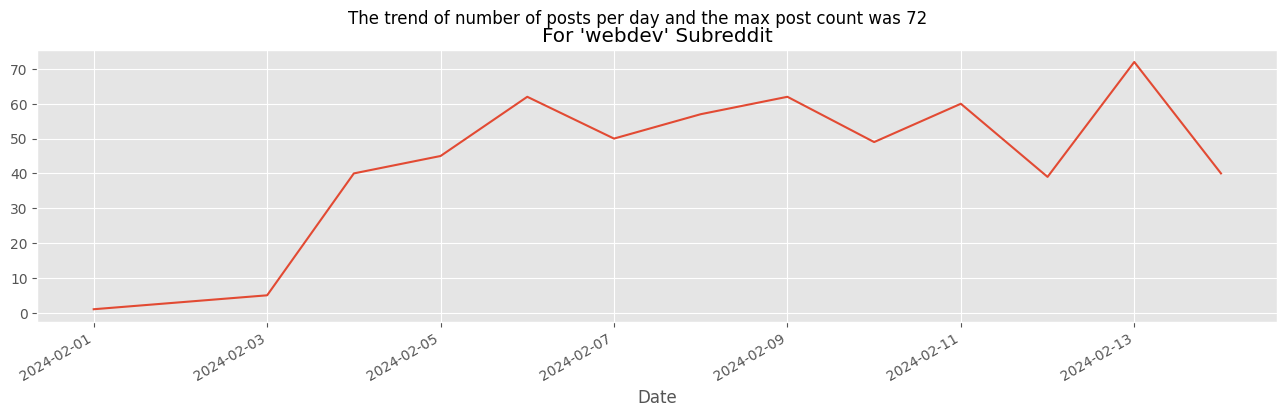

In [26]:
plt.style.use("ggplot")
df2_wd.groupby("Date")["Title"].count().plot(figsize=(16, 4))
plt.title("For 'webdev' Subreddit")
plt.suptitle(
    "The trend of number of posts per day and the max post count was "
    + str(df2_wd.groupby("Date")["Title"].count().max())
)

In [27]:
# joining all the title rows and tokenize them into words
all_titles = " ".join(df_wd["Title"])
words = word_tokenize(all_titles)
pprint(all_titles)

("Monthly Getting Started / Web Dev Career Thread I'm a Web Dev not a master "
 'of all programming languages. How do you convince a restaurant that only '
 'uses Facebook that a website woild be beneficial? Domain expired: played the '
 "long game, now what What's the most tedious mind numbing part of web dev? "
 'The 10 step process to blow $50k on simple website content updates. '
 'Enlighten me about mobile-first How would I go about creating something like '
 'this interactive website intro. Looking for a very specific solution - keep '
 'focus when resizing. How to integrate existing catalogue mailing list into '
 "new ecommerce signups Improving Web Observability with Sentry's new approach "
 'to source maps How do you keep up with tasks? How would you make this? CSS '
 'or make it as an Image? Targeting specific images within css bg to move with '
 'a slider Limit max-width for hero background images on wide monitors or not? '
 "Etiquette for 'hotlinking' vs 'reproducing' (full

In [28]:
# sorting the dates
df2_wd.groupby("Date", as_index=False)["Title"].count().sort_values(
    by="Title", ascending=False
)

,Date,Title
11,2024-02-13,72
4,2024-02-06,62
7,2024-02-09,62
9,2024-02-11,60
6,2024-02-08,57
5,2024-02-07,50
8,2024-02-10,49
3,2024-02-05,45
2,2024-02-04,40
12,2024-02-14,40


In [29]:
# to clean the words of punctuations, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words("english")]
    # to deal with alphabets at the moment
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [30]:
lowered = clean_words(words)  # converting all words to lowercase
# lowered

In [31]:
bow = Counter(lowered)  # to count the words
# bow

In [32]:
# creating data frame for visualization of frequency of words
data_wd = pd.DataFrame(bow.items(), columns=["Word", "Frequency"]).sort_values(
    by="Frequency", ascending=False
)

In [33]:
data_words_wd = data_wd.head(30)  # n = 30 for proper analysis

# Bar Plot


Text(0.5, 1.0, "For 'webdev' Subreddit")

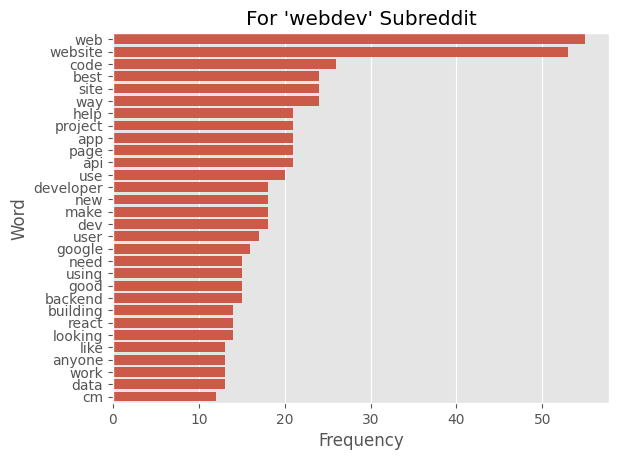

In [34]:
sns.barplot(x="Frequency", y="Word", data=data_words_wd)
plt.title("For 'webdev' Subreddit")

# Result: The most frequent word is 'website'


# 2.2. Analysing emojis


In [35]:
import emoji

In [36]:
def get_emojis_wd(sentence):
    sentence = " ".join(sentence)
    words = word_tokenize(sentence)
    emojis = [e for e in words if e in emoji.EMOJI_DATA]
    return emojis

In [37]:
emojis_bow_wd = get_emojis_wd(df_wd["Title"])
Counter(emojis_bow_wd).items()

dict_items([('🐽', 1), ('🧑\u200d💻', 1), ('🎬', 1)])

# Creating and analyzing data frame for emojis


In [38]:
emoji_count_wd = Counter(emojis_bow_wd).items()
emoji_frame_wd = pd.DataFrame(emoji_count_wd, columns=["Emoji", "Count"])
emoji_frame_wd.sort_values(by="Count", ascending=False)

,Emoji,Count
0,🐽,1
1,🧑‍💻,1
2,🎬,1


# 3. Comparative analysis across the two subreddits


# 3.1. The trend for number of posts per day across the two subreddits


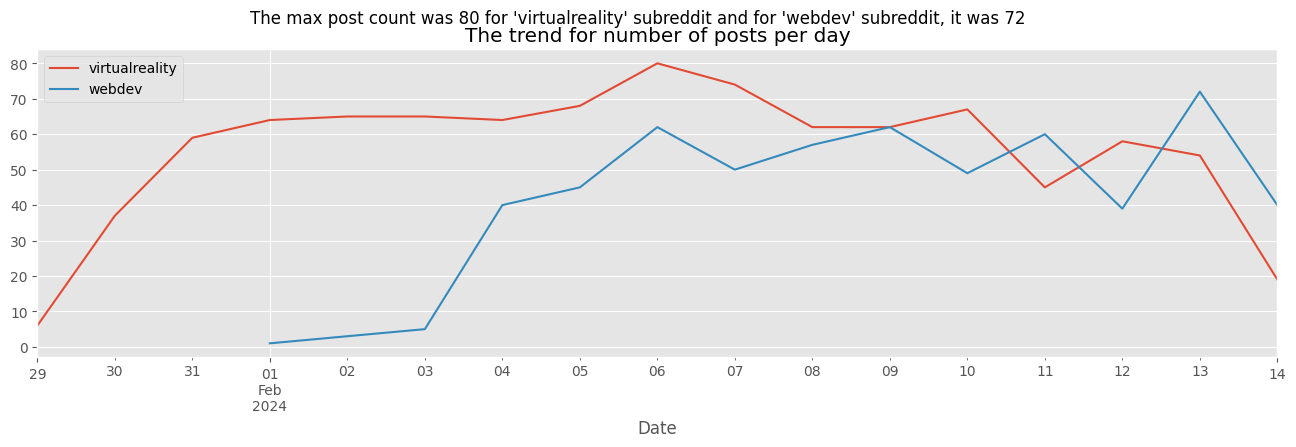

In [39]:
plt.style.use("ggplot")

# Plot for df2_vr
df2_vr.groupby("Date")["Title"].count().plot(
    figsize=(16, 4), label="virtualreality")
# Plot for df2_wd
df2_wd.groupby("Date")["Title"].count().plot(figsize=(16, 4), label="webdev")

plt.title("The trend for number of posts per day")
plt.suptitle(
    "The max post count was "
    + str(df2_vr.groupby("Date")["Title"].count().max())
    + " for 'virtualreality' subreddit and for 'webdev' subreddit, it was "
    + str(df2_wd.groupby("Date")["Title"].count().max())
)

plt.legend()